In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/kaggle/Admission_Predict_Ver1.1.csv').drop(['Serial No.'], axis=1)

In [3]:
data.shape

(500, 8)

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [28]:
np.unique(data['Research'], return_counts=True)

(array([0, 1], dtype=int64), array([220, 280], dtype=int64))

In [7]:
X, y = data.drop(['Chance of Admit '], axis=1), data['Chance of Admit ']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
model.score(X_test, y_test)

0.8242314445551622

In [13]:
y_test[:10]

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
394    0.89
377    0.47
124    0.57
68     0.68
450    0.82
Name: Chance of Admit , dtype: float64

In [14]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


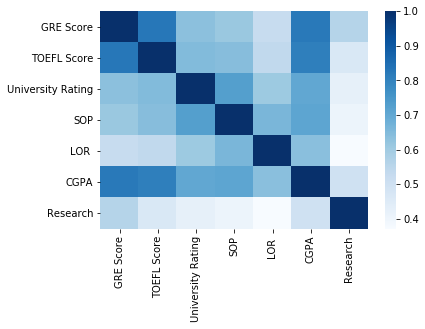

In [15]:
sns.heatmap(X.corr(), cmap=plt.cm.Blues)

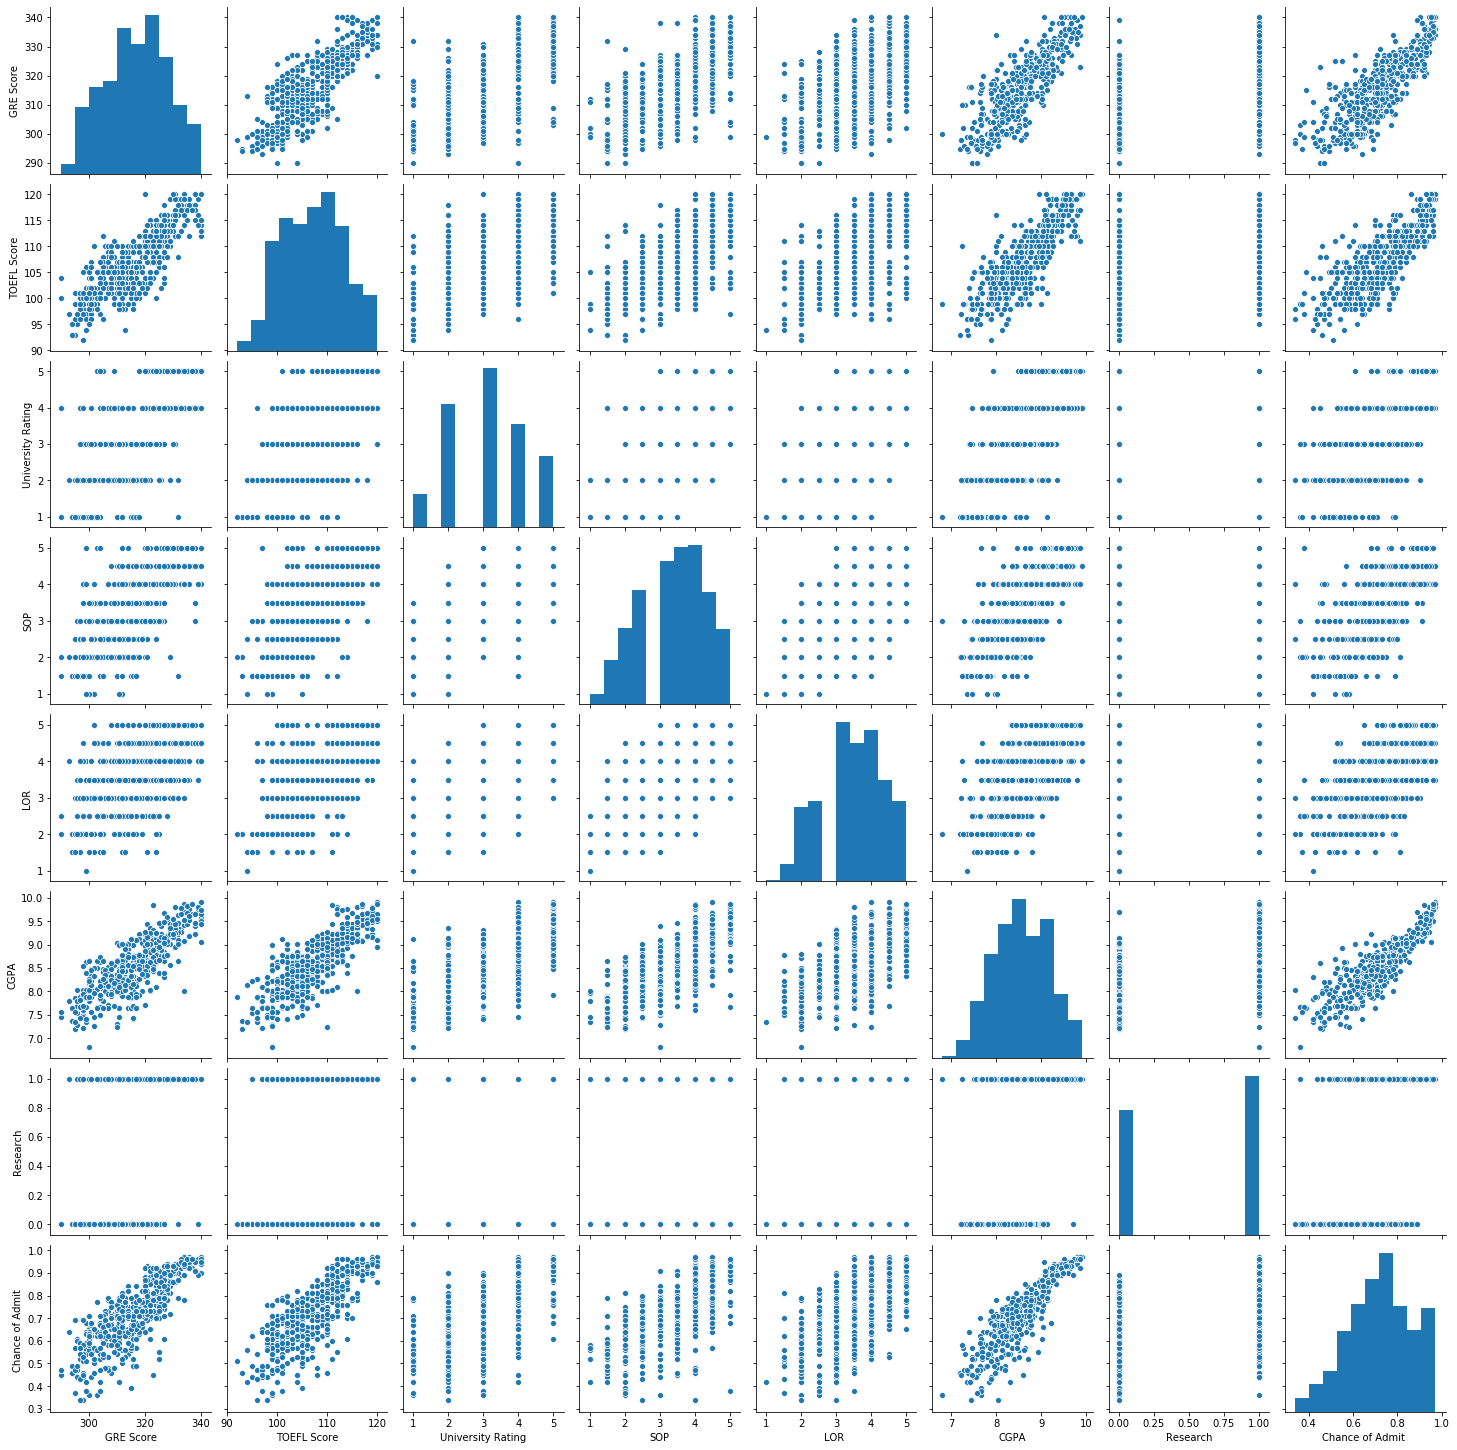

In [26]:
sns.pairplot(data)

In [16]:
np.mean(np.array(X.corr()), axis=0)

array([0.71286139, 0.70579413, 0.6791645 , 0.68141552, 0.62122787,
       0.74180577, 0.53420144])

In [17]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (with ``kind="swarm"``)

Categorical distribution plots:

- :func:`boxplot` (with ``kind="box"``)
- :func:`violinplot` (with ``kind="violin"``)
- :func:`boxenplot` (with ``kind="boxen"``)

Categorical estimate plots:

- :func:`pointplot` (with ``kind="point"``)
- :func:`barplot` (with ``kind="bar"``)
- :func:`countplot` (with ``kind="count"``)

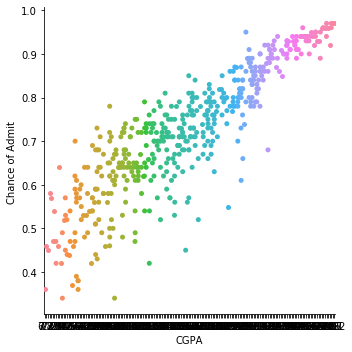

In [18]:
sns.catplot(x='CGPA', y='Chance of Admit ', data=data, kind='strip')
# Higher CGPA gives higher chance of admission

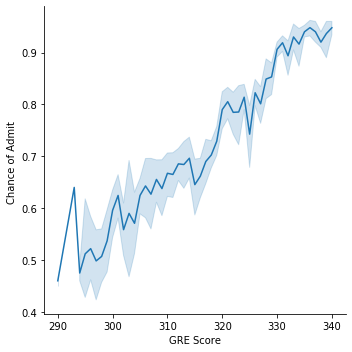

In [24]:
sns.relplot(x='GRE Score', y='Chance of Admit ', data=data, kind='line')
#higher GRE score means higher chance of admission 

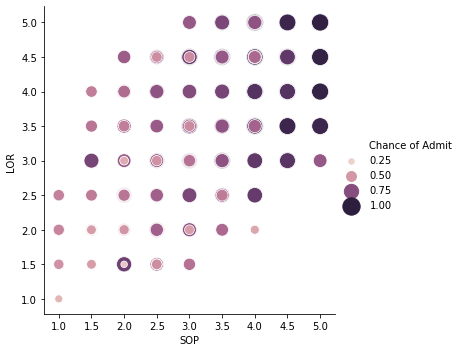

In [22]:
sns.relplot(x='SOP', y='LOR ', data=data, hue='Chance of Admit ', size='Chance of Admit ', sizes=(30,300))
# Your Letter of recommendation and your Statement of Purpose also matter a fair amount

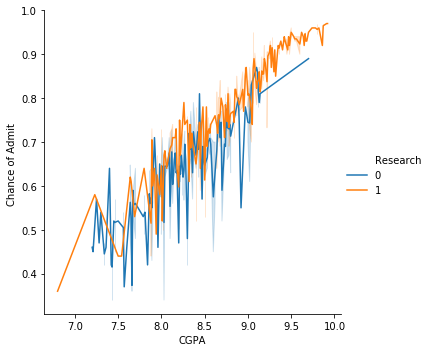

In [32]:
sns.relplot(kind='line', x='CGPA', y='Chance of Admit ', data=data, hue='Research')
# A good CGPA can still result in low Chances of Admission, if no research was done by the applicant

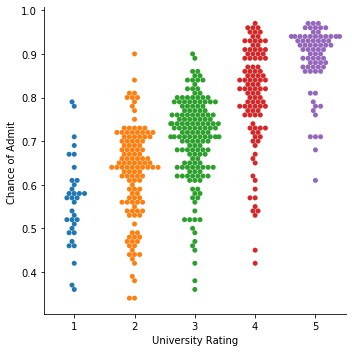

In [35]:
sns.catplot(kind='swarm', x='University Rating', y='Chance of Admit ', data=data);
# Better University Ranking means 